In [2]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


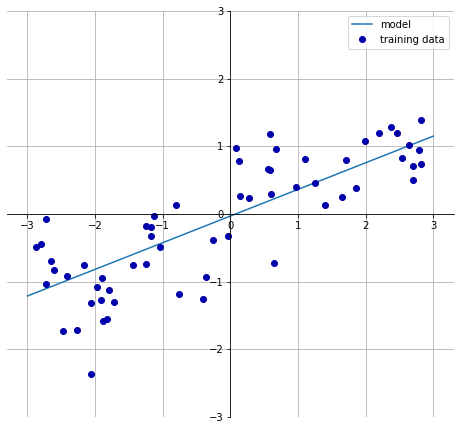

In [8]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


$R^2$: around 0.66 (not very good)<br>
scores on the training and test sets are very close toghether: likely underfitting

In [7]:
X, y = mglearn.datasets.load_extended_boston()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Score on training set is close to 1; predict very accurately on the training set<br>
$R^2$ on the test set is much worse: clearly overfitting<br><br>
Should try to find a model that allows us to control complexity, __Ridge Regression__

In [1]:
from sklearn.linear_model import Ridge

In [12]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Compared to the result above, using LinearRegrssion, the training set score of Ridge is lower while the test set score is higher

In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #default alpha = 1.0
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


inspecting the coef_ attribute of models wtih different values of alpha

In [17]:
import matplotlib.pyplot as plt

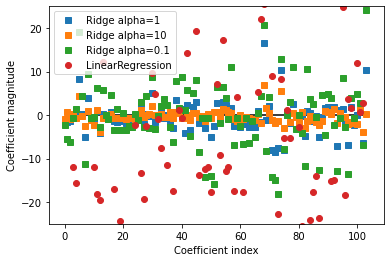

In [19]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

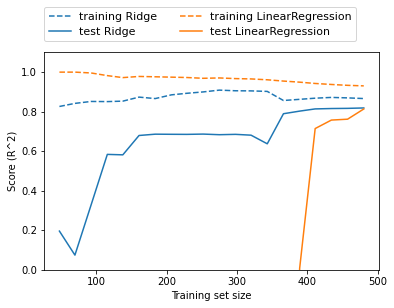

In [20]:
mglearn.plots.plot_ridge_n_samples()

- with enough training data, regularization becomes less important!
- if more data is added, it becomes harder for a model to overfit (decrease in training performance for linear regression)

__Lasso__<br>
- some coefficients are exactly zero (some features are entirely ignored by the model)
- makes a model easier to interpret
- can reveal the most important features of the model

In [23]:
from sklearn.linear_model import Lasso
import numpy as np

In [24]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [25]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33
